In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df['Survived'].mean()

0.3838383838383838

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


First Basic Questions
    1. Who were the passenger on the titanic?
    2. What deck were the passenger on and how deos it relate to their deck?
    3. Where did the passegners come from?
    4. Who was alone and who was with the family?
    
    5. What factors helped someone survive from sinking?
    
    
    
Who were the passengers?

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

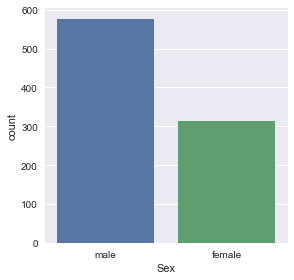

In [11]:
sns.factorplot('Sex',data=titanic_df, kind="count")

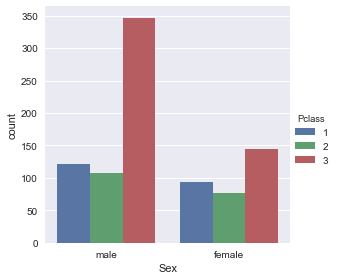

In [12]:
sns.factorplot('Sex',data=titanic_df,hue='Pclass',kind="count")

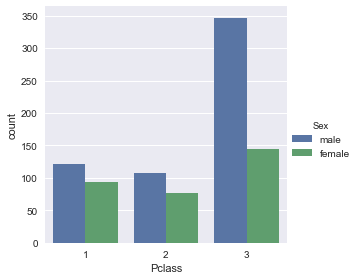

In [13]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind="count")

In [14]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [15]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [18]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


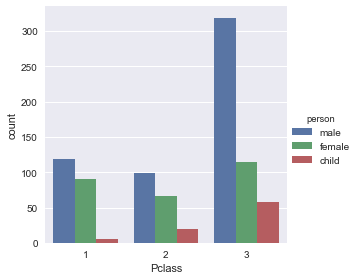

In [20]:
sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count')

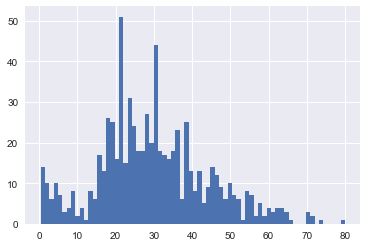

In [21]:
titanic_df['Age'].hist(bins=70)

In [22]:
titanic_df['Age'].mean()

29.69911764705882

In [24]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

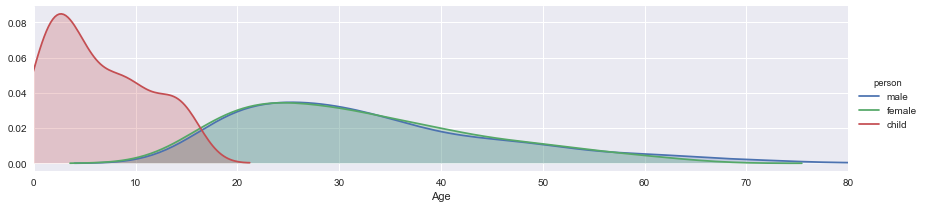

In [27]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

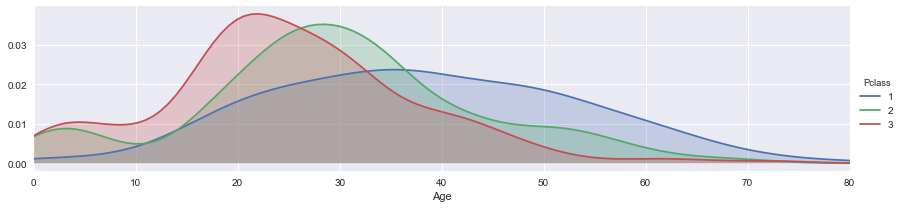

In [28]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

2. What deck were the passenger on and how does it relate to their deck?

In [29]:
deck = titanic_df['Cabin'].dropna()

In [34]:
deck.tail()

871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, dtype: object

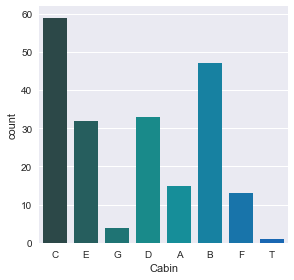

In [32]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin_df,palette='winter_d', kind='count')

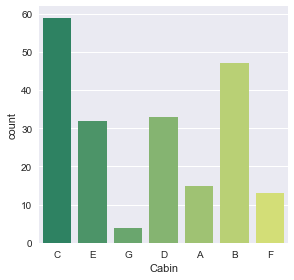

In [33]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.factorplot('Cabin',data=cabin_df,palette='summer', kind='count')

3 Where did the passengers come from?

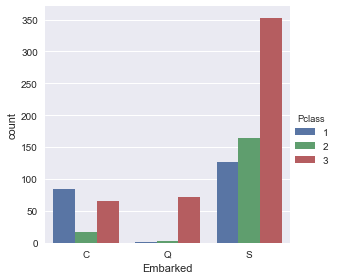

In [36]:
sns.factorplot('Embarked', data=titanic_df,hue='Pclass',order=['C','Q','S'],kind='count')

4 Who was alone and who was with family

In [38]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [39]:
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [44]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Fam'

titanic_df['Alone'].loc[titanic_df['Alone'] < 1] = 'Alone'

In [45]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Fam
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Fam
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Fam
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


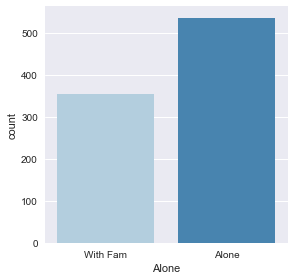

In [47]:
sns.factorplot('Alone',data=titanic_df,palette='Blues',kind='count')

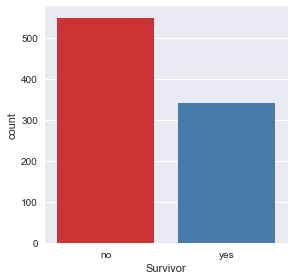

In [52]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.factorplot('Survivor',data=titanic_df, palette='Set1',kind='count')

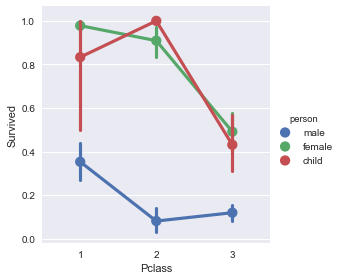

In [63]:
sns.factorplot('Pclass','Survived', hue='person',data=titanic_df)

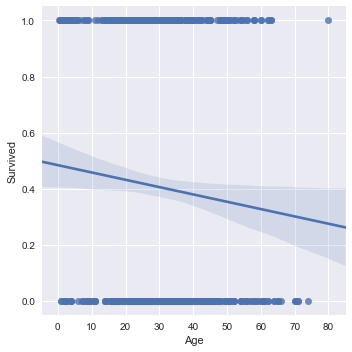

In [64]:
sns.lmplot('Age','Survived',data=titanic_df)

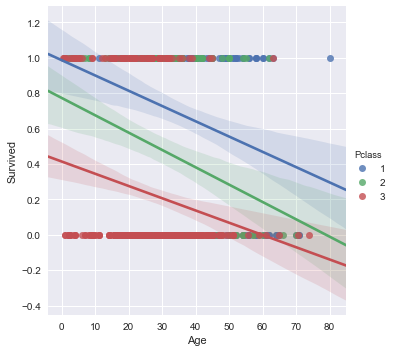

In [65]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df)

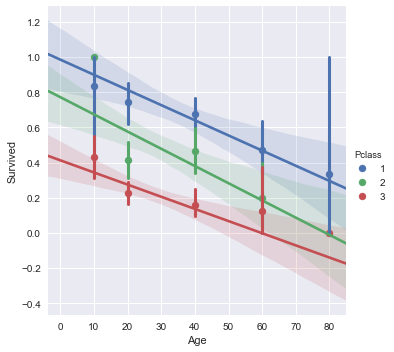

In [67]:
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=generations)

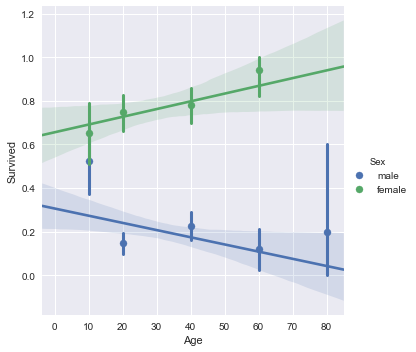

In [69]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,x_bins=generations)

1)did deck have an effect on survavial 

2)did having a family member increase the odds of surviving

In [74]:
def cabinletter(deck):
    for level in str(deck):
        if deck == np.nan:
            return 0
        else:
            return str(level)[0]
titanic_df['Deck'] = titanic_df['Cabin'].apply(cabinletter)

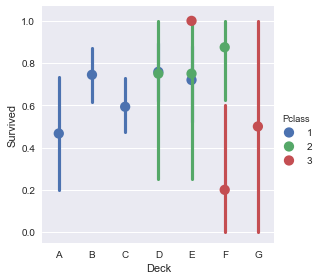

In [93]:
sns.factorplot('Deck','Survived', hue='Pclass',data=titanic_df, join=False, order=['A','B','C','D','E','F','G'])

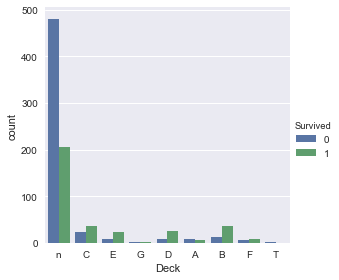

In [85]:
sns.factorplot('Deck',hue='Survived',data=titanic_df,kind='count')

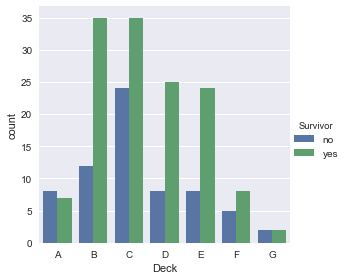

In [86]:
sns.factorplot('Deck',data=titanic_df,hue='Survivor',kind='count',order=['A','B','C','D','E','F','G'])

In [87]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Fam,no,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Fam,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Fam,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,n


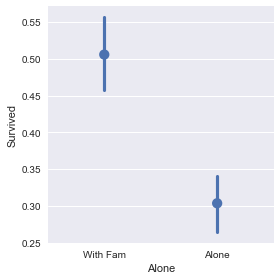

In [89]:
sns.factorplot('Alone','Survived',data=titanic_df, join=False)

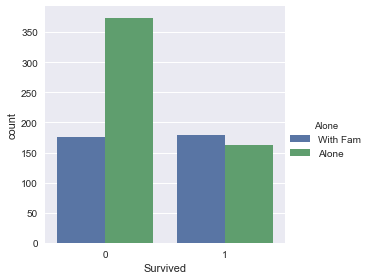

In [91]:
sns.factorplot('Survived',hue='Alone', data=titanic_df, kind='count')

- We can clearly see that B & C decks has the highest amount of survives which I believe they are the closest to the exit they are also filled with 1st class passengers. I would say that some cabins had more advantage compared yo others.

- Furthermore, we can clearly see that having a fmaily member increased the chance of survival